### Computing standing wave ratio from reflection coefficients ###

For a single port measurement on the [NanoVNA](https://nanovna.com/), the standing wave ratio ([SWR](https://en.wikipedia.org/wiki/Standing_wave_ratio)) defined by the in and out of phase wave amplitudes, $\left|V_{max}\right|$ and $\left|V_{min}\right|$. These amplitudes can be computed from the reflected wave amplitude $\left|V_r\right|$ amd forward wave amplitude $\left|V_f\right|$. The [complex](https://www.allaboutcircuits.com/textbook/radio-frequency-analysis-design/radio-frequency-demodulation/understanding-i-q-signals-and-quadrature-modulation/) reflected and forward waves $V_r$ and $V_f$ define the reflection coefficient 

$$\Gamma = \frac{V_r}{V_f}$$

Which is [measured by the NanoVNA](https://nanovna.com/?page_id=60). To express the SWR in terms of this coefficient, consider the in phase wave amplitude
$$\left| V_{max} \right| = \left|V_f\right|+\left|V_r\right|$$ 

Re-arrange the reflection coefficient expression and factor
$$\left| V_{max} \right| = \left|V_f\right|+\left|\Gamma V_f\right| = \left( 1+\left| \Gamma \right|\right) \left| V_f \right|$$ 

And the out of phase wave amplitude 
$$\left| V_{min} \right|  = \left|V_f\right|-\left|V_r\right|$$

Use the same substitution
$$\left| V_{min} \right| = \left|V_f\right|-\left|\Gamma V_f\right| = \left(1-\left| \Gamma \right| \right) \left| V_f \right|$$

So
$$SWR = \frac{\left|V_{max}\right|}{\left|V_{min}\right|} = \frac{1+\left|\Gamma\right|}{1-\left|\Gamma\right|}$$ 

The nanoVNA measures the real and imaginary components of the reflection coefficient, from which the SWR is computed. Thanks to [NanoVNASaver](https://nanovna.com/?page_id=90), this data is accessible via the [Touchstone](https://en.wikipedia.org/wiki/Touchstone_file) `.snp` file.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('C:/Users/alexa/OneDrive/Documents/Amateur Radio/nanoVNA/moonraker/uhf.s1p',delimiter=' ',names=[ 'HZ', 'S', 'RI' ], skiprows=1)
df = df.rename(columns={'S': 'Re(\u0393)', 'RI': 'Im(\u0393)'})
df['|\u0393|'] = np.sqrt(df['Re(\u0393)']**2+df['Im(\u0393)']**2)
df['SWR'] = (1+df['|\u0393|'])/(1-df['|\u0393|'])
df

,HZ,Re(Γ),Im(Γ),|Γ|,SWR
0,430000000,-0.201732,-0.077345,0.216051,1.551186
1,430035714,-0.199978,-0.076287,0.214034,1.544641
2,430071428,-0.198760,-0.075176,0.212502,1.539689
3,430107142,-0.199123,-0.074846,0.212725,1.540408
4,430142856,-0.195320,-0.073682,0.208756,1.527665
...,...,...,...,...,...
500,447857000,-0.061646,-0.157757,0.169374,1.407824
501,447892714,-0.060316,-0.158628,0.169708,1.408791
502,447928428,-0.060431,-0.159582,0.170641,1.411502
503,447964142,-0.058996,-0.160024,0.170553,1.411245


(1.0, 3.0)

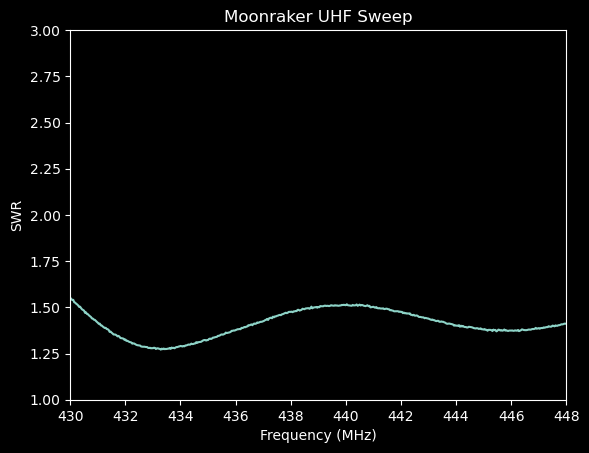

In [23]:
plt.style.use('dark_background')
plt.plot(df['HZ']/1e6,df['SWR'])
plt.xlabel('Frequency (MHz)')
plt.ylabel('SWR')
plt.title('Moonraker UHF Sweep')
plt.xlim([430,448])
plt.ylim([1,3])